# Assignment: "ML with Sklearn"
####Abigail Smith

####ARS190011

####CS 4375.004

####Dr. Mazidi

####Summary:
    This program is for assignment "ML with Sklearn". This program reads in the provided "Auto.csv" 
    and does data exploration. Then the program makes a logistic regression, decision tree, and neural
    network

In [464]:
# Libraries
import pandas as pd
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor

#### 1. Read the Auto data

In [465]:
# Prompting user when program starts
print("RUNNING main.py...")

imageHeight = 9 # Set image height for different graphs

# a. Using pandas to read in provided data file
df = pd.read_csv("data//Auto.csv")

# b. Outputing the first few rows
print("\nTop 3 observations from dataframe:")
print(df.head(3))

# c. Outputing the dimensionality
print("\nDimensionality of dataframe:")
print(df.shape)

RUNNING main.py...

Top 3 observations from dataframe:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  

Dimensionality of dataframe:
(392, 9)


#### 2. Data Exploration with Code


In [466]:
# a. Using describe() on mpg, weight, and year columns
print("Calling describe() on column \"mpg\"")
print(df["mpg"].describe())
print("\nCalling describe() on column \"weight\"")
print(df["weight"].describe())
print("\nCalling describe() on column \"year\"")
print(df["year"].describe())

# b. Write commends indicating the range and average of each column
# Column          Max         Min         Range           Average
# mpg             46.6        9           37.6            23.45
# weight          5140        1613        3,527           2977.58
# year            82          70          12              76.01


Calling describe() on column "mpg"
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Calling describe() on column "weight"
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Calling describe() on column "year"
count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


#### 3. Explore Data Types

In [467]:
# a. Checking the data type of all columns
print("Checking the data types of all columns")
print(df.dtypes)

# b, d. Changing the cylinders column to categorical by cat.codes
print("\nChanging column \"cylinders\" to type category")
print("\tBefore changing:")
print(df["cylinders"].dtypes)
df["cylinders"] = df["cylinders"].astype("category").cat.codes
print("\tAfter changing:")
print(df["cylinders"].dtypes)

# c, d. Changing the origin column to categorical without using cat.codes
print("\nChanging column\"origin\" to type category")
print("\tBefore changing:")
print(df["origin"].dtypes)
df["origin"] = df["origin"].astype("category")
print("\tAfter changing:")
print(df["origin"].dtypes)

Checking the data types of all columns
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

Changing column "cylinders" to type category
	Before changing:
int64
	After changing:
int8

Changing column"origin" to type category
	Before changing:
int64
	After changing:
category


#### 4. Deal with NAs

In [468]:
# a. Deleting rows with NAs
print("Count of NAs before removing rows with NAs:")
print(df.isnull().sum())
df = df.dropna()
print("\nCount of NAs after removing rows with NAs:")
print(df.isnull().sum())

# b. Outputing the new dimensions
print("\nDimensionality of dataframe:")
print(df.shape)

Count of NAs before removing rows with NAs:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

Count of NAs after removing rows with NAs:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Dimensionality of dataframe:
(389, 9)


#### 5. Modify Columns

In [469]:
# a. Modifying columns
print("Creating new column named \"mpg_high\"")
averageMPG = df["mpg"].mean()
df.insert(0, "mpg_high", 2)

# Writing 0 or 1 to column mpg_high depending on value in column mpg
print("\tBefore updating column \"mpg_high\" values:")
print(df["mpg_high"])

for i, j in df.iterrows():
    if(j["mpg"] >= averageMPG):
        df.at[i, "mpg_high"] = 1
    else:
        df.at[i, "mpg_high"] = 0

print("\tAfter updating column \"mpg_high\" values:")
print(df["mpg_high"])

# b. Dropping column mpg and column name
print("\nDrop columns \"mpg\" and \"name\"")
print("\tAfter dropping column \"mpg\":")
df = df.drop(columns=["mpg", "name"])

# c. Outputing the first few rows of the modifed data frame
print("\nTop 5 observations:")
print(df.head(5))

Creating new column named "mpg_high"
	Before updating column "mpg_high" values:
0      2
1      2
2      2
3      2
6      2
      ..
387    2
388    2
389    2
390    2
391    2
Name: mpg_high, Length: 389, dtype: int64
	After updating column "mpg_high" values:
0      0
1      0
2      0
3      0
6      0
      ..
387    1
388    1
389    1
390    1
391    1
Name: mpg_high, Length: 389, dtype: int64

Drop columns "mpg" and "name"
	After dropping column "mpg":

Top 5 observations:
   mpg_high  cylinders  displacement  horsepower  weight  acceleration  year  \
0         0          4         307.0         130    3504          12.0  70.0   
1         0          4         350.0         165    3693          11.5  70.0   
2         0          4         318.0         150    3436          11.0  70.0   
3         0          4         304.0         150    3433          12.0  70.0   
6         0          4         454.0         220    4354           9.0  70.0   

  origin  
0      1  
1      1  


### 6. Data Exploration with Graphs
d. For each graph, write a comment indicating one thing you learned about the data from the graph.

catplot (mpg_high):
    This plot shows the distribution of the values in column "mpg_high". This graph shows that the new column "mpg_high" has only 0 and 1 values. We can also see there's nearly the same amount of 0 and 1 in column "mpg_high".

catplot (horsepower, weight, mpg_high): 
    This plot shows the distribution of horsepower by weight where each dot's color indicats whether the 
    observation was labeled with a high mpg or a low mpg. From this graph, we can see that majority of 
    high mpgs have a lower horsepower and a lower weight. In contrast, we can also see that majority of
    low mpgs have a higher horsepower and a higher weight.

boxplot:
    This plot shows the boxplot of mpg_high to weight. The minimum weight for a lower mpg is 
    higher than the minimum weight for a higher mpg. The median weight for a boxplot with a 
    lower mpg is higher than the median weight for a higher mpg. The maxium weight for a 
    lower mpg is higher than the maximum weight for a lower mpg. Additionally, a lower 
    mpg has a wider range than the weight for a higher mpg. Finally, there more outliers for 
    a higher mpg than a lower mpg.

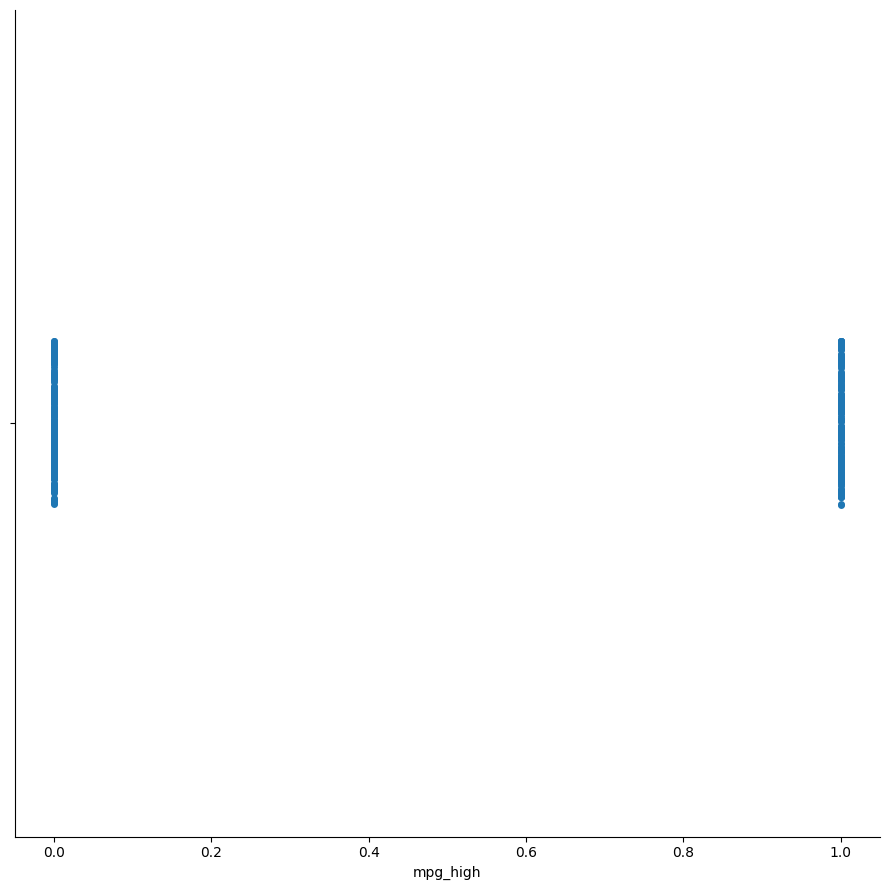

In [470]:
# a. Using seaborn catplot on column mpg_high
sb.catplot(df, x = "mpg_high", height = imageHeight)

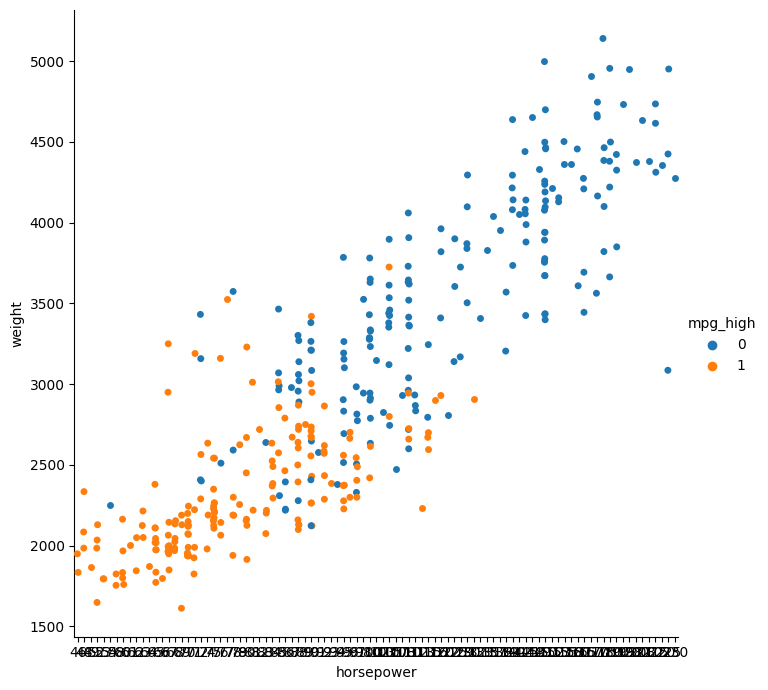

In [471]:
# b. Reploting with column "horsepower" on x-axis, column "weight" on y-axis, 
# and setting hue set to column "mpg_high"
sb.catplot(data = df, x = "horsepower", y = "weight", hue = "mpg_high", height = imageHeight-2)

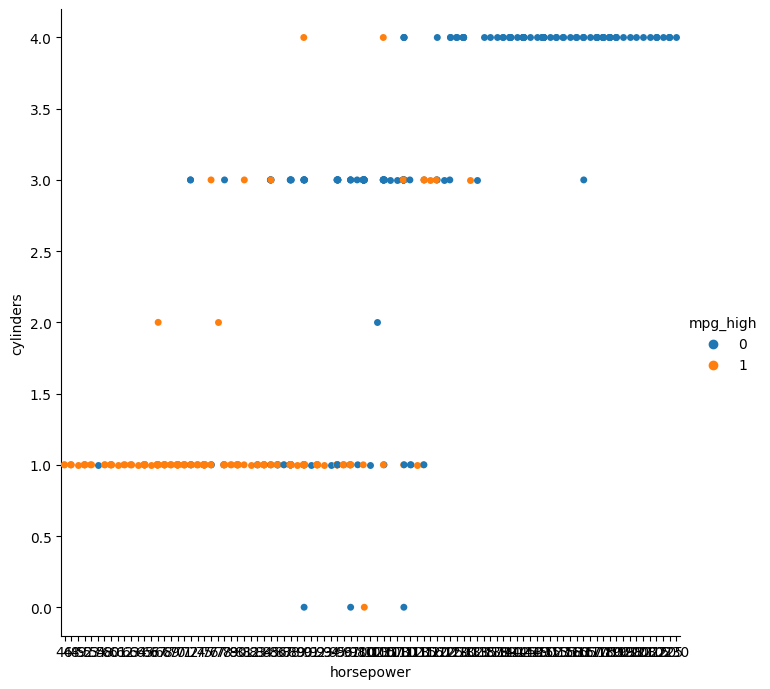

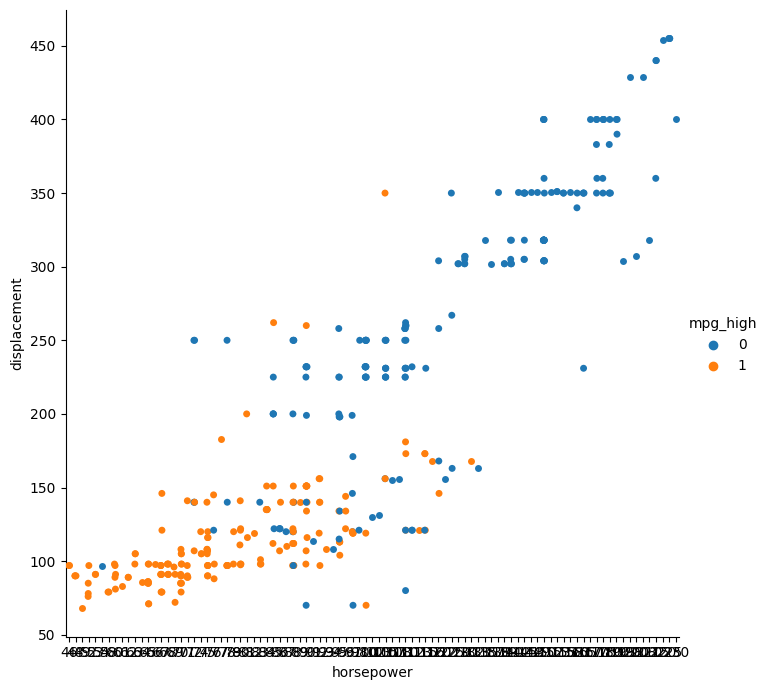

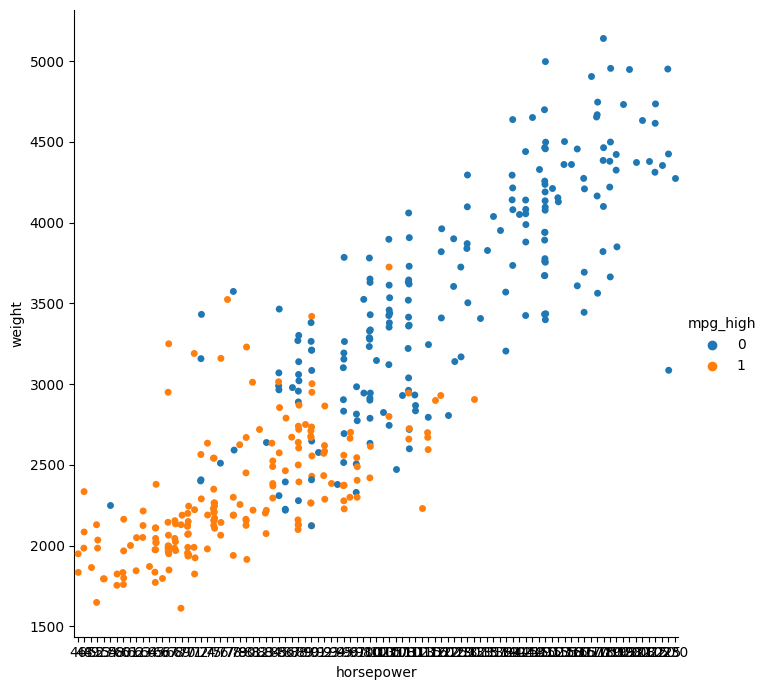

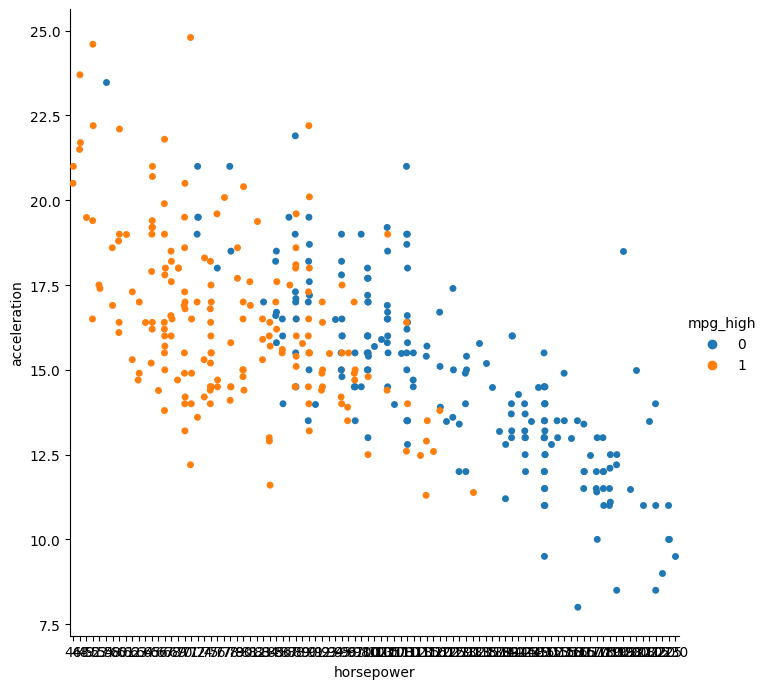

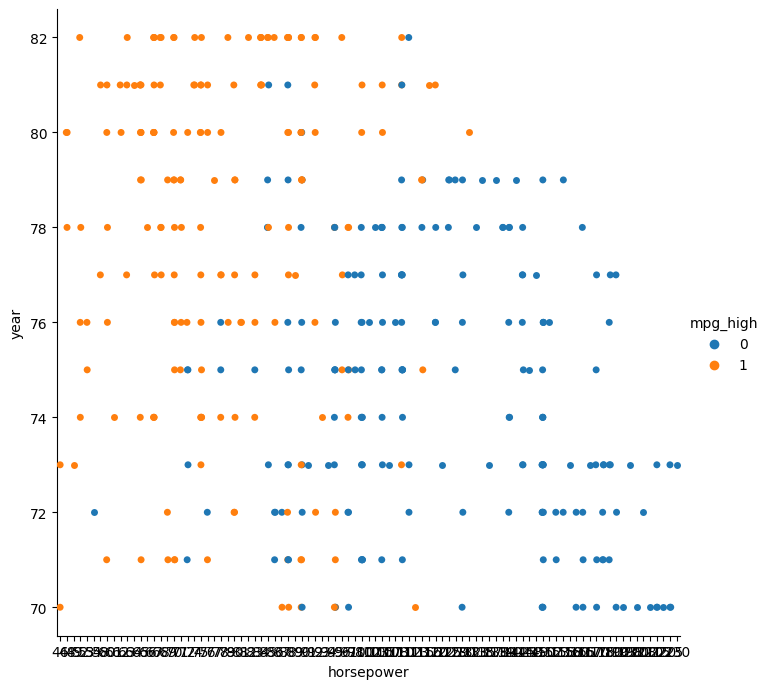

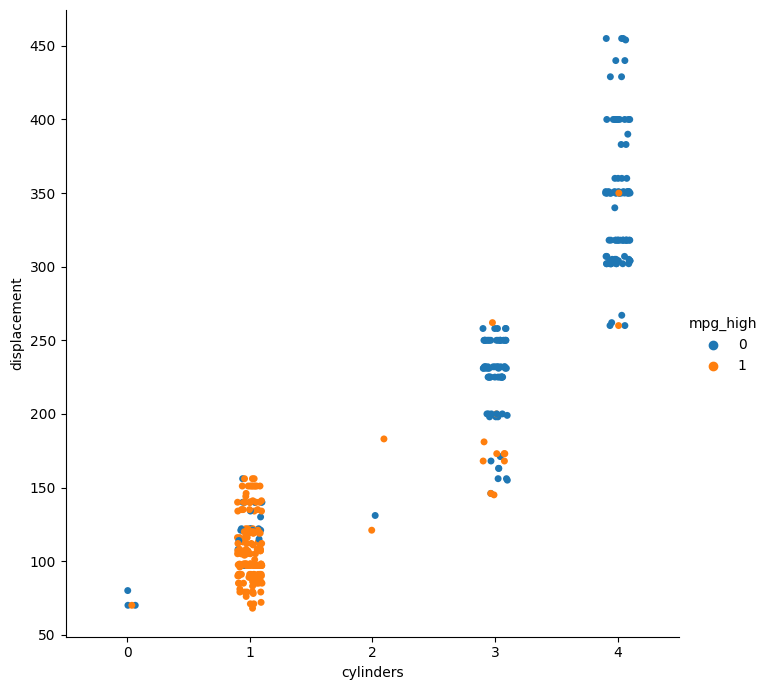

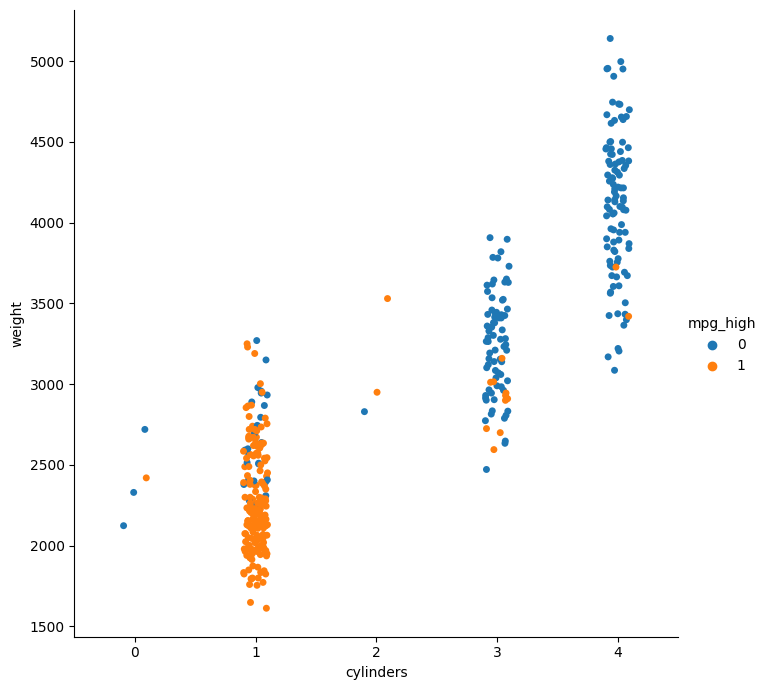

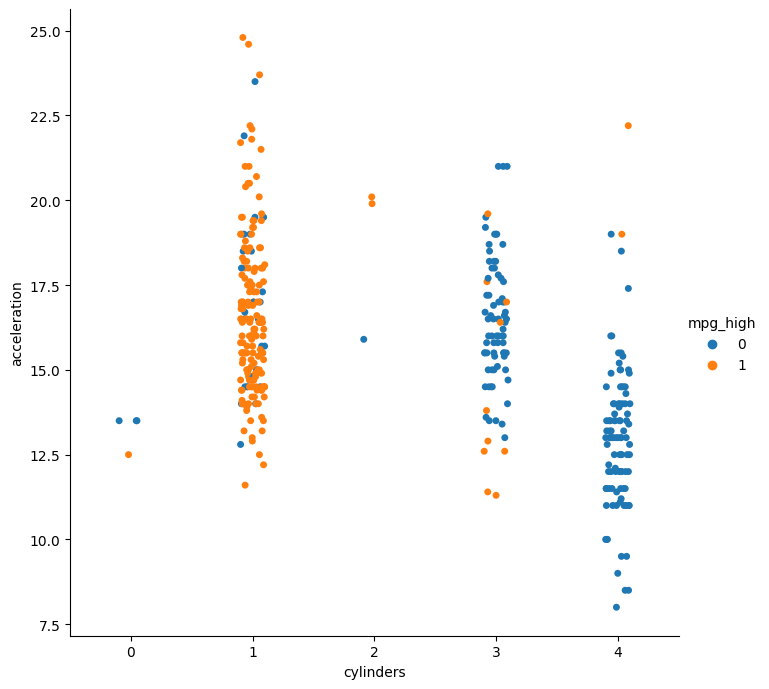

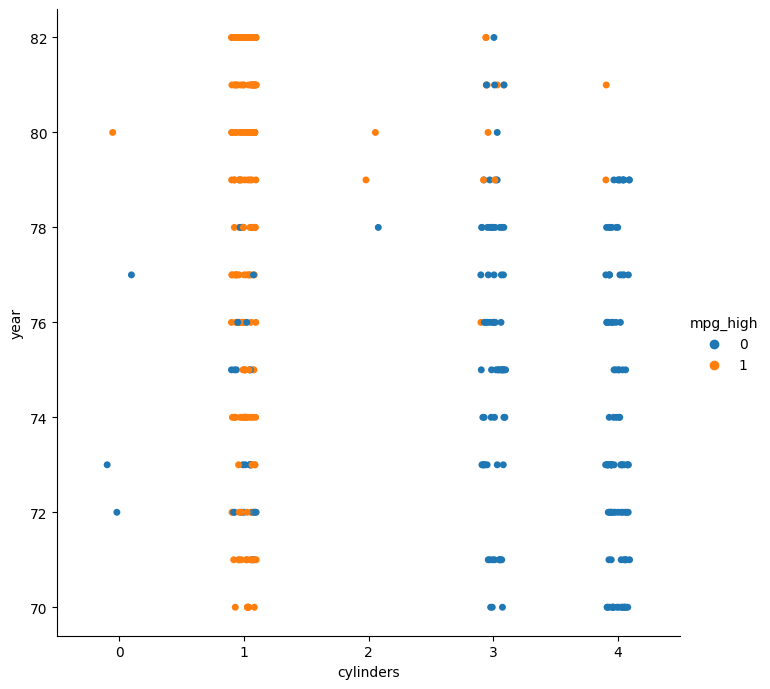

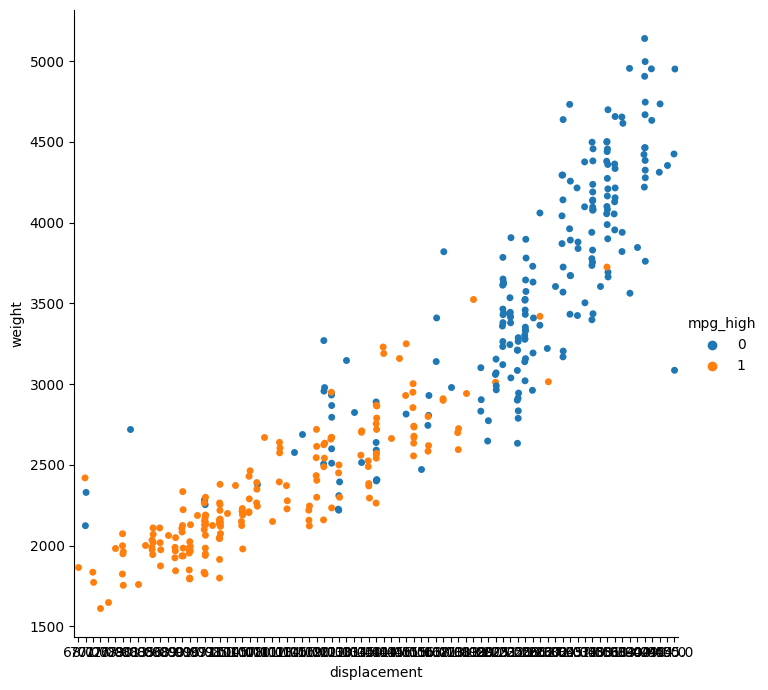

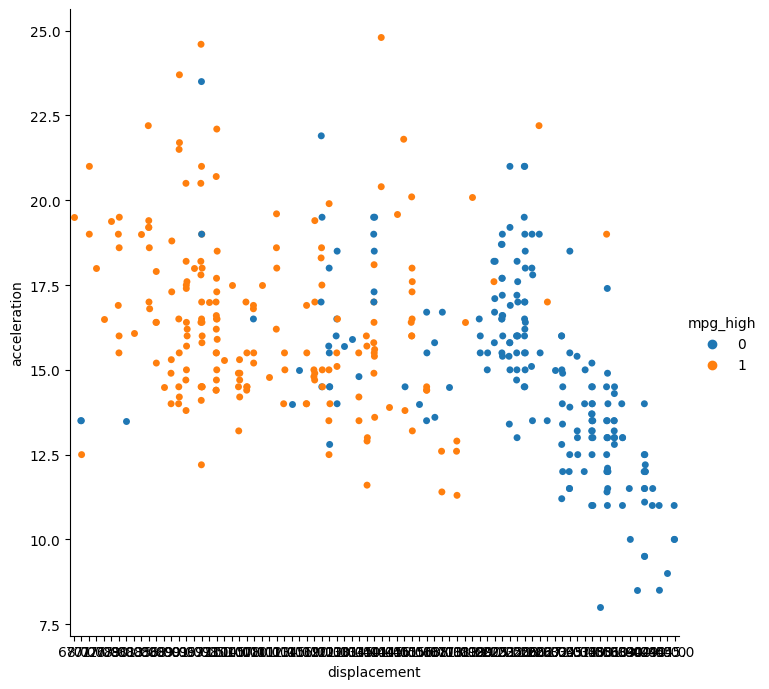

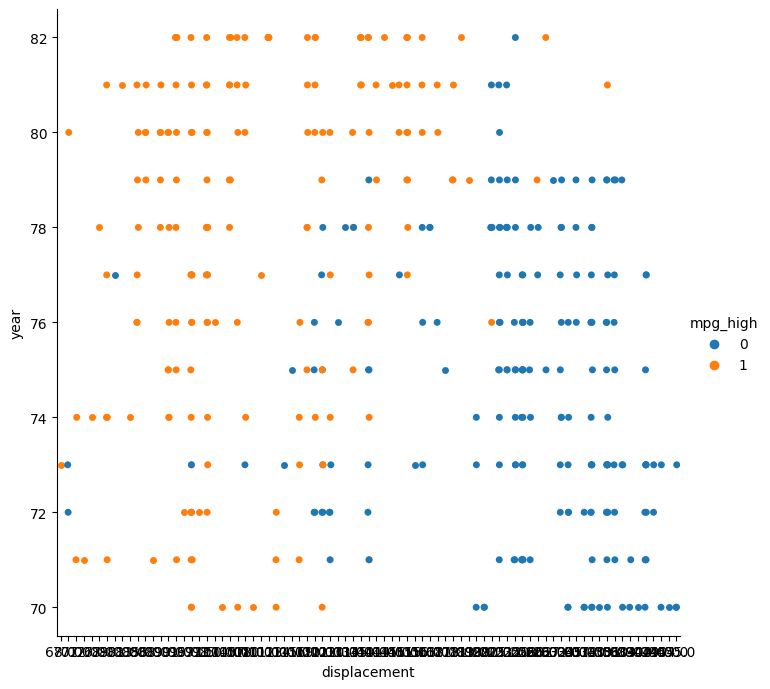

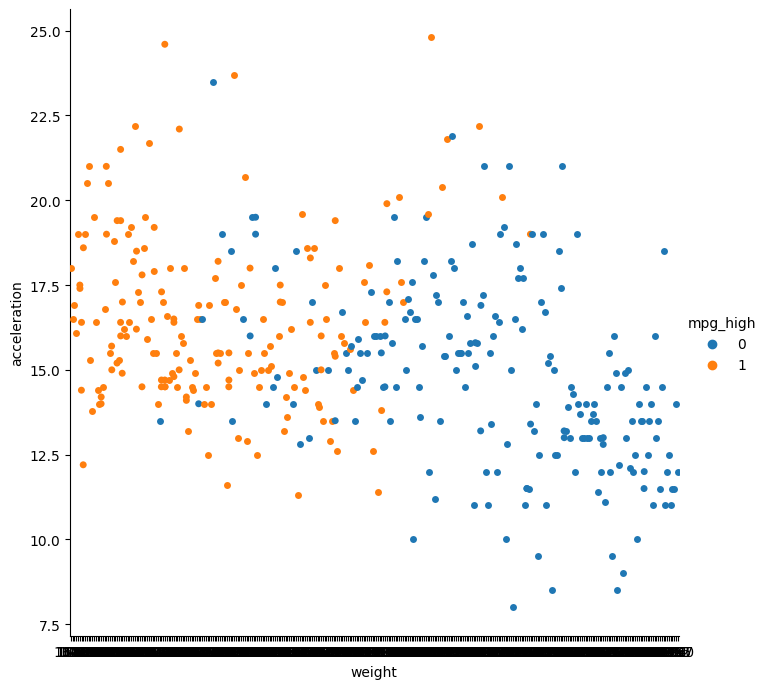

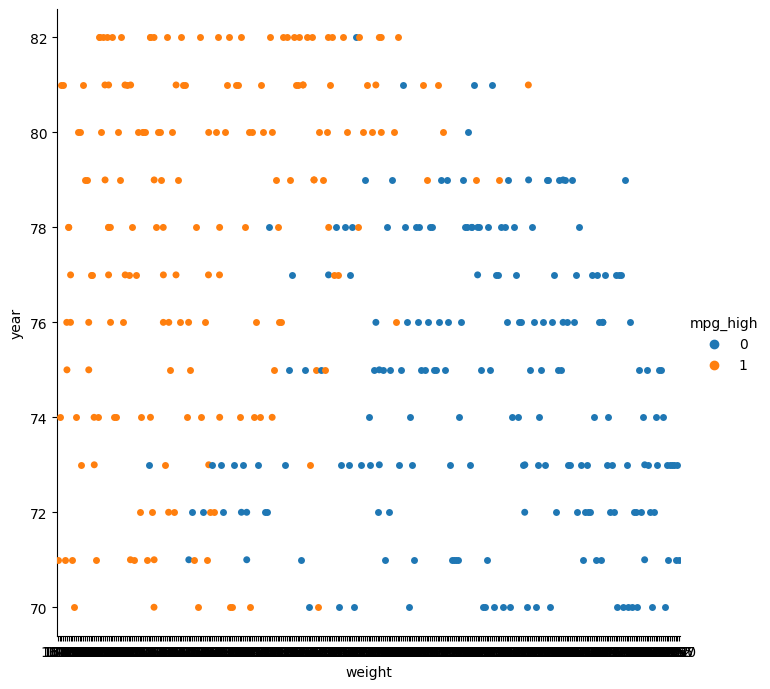

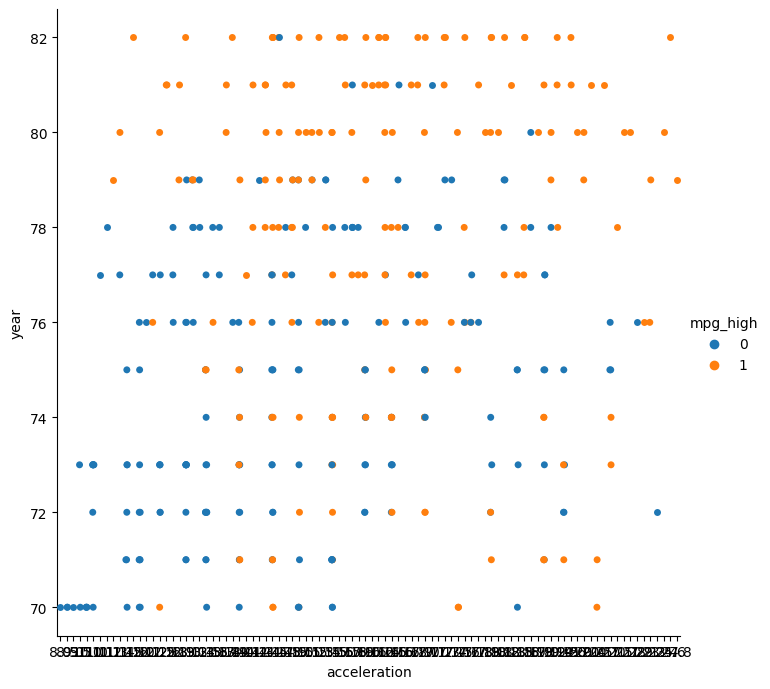

In [484]:
# pg,cylinders,displacement,horsepower,weight,acceleration,year
sb.catplot(data = df, x = "horsepower", y = "cylinders", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "horsepower", y = "displacement", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "horsepower", y = "weight", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "horsepower", y = "acceleration", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "horsepower", y = "year", hue = "mpg_high", height = imageHeight-2)

sb.catplot(data = df, x = "cylinders", y = "displacement", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "cylinders", y = "weight", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "cylinders", y = "acceleration", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "cylinders", y = "year", hue = "mpg_high", height = imageHeight-2)

sb.catplot(data = df, x = "displacement", y = "weight", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "displacement", y = "acceleration", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "displacement", y = "year", hue = "mpg_high", height = imageHeight-2)

sb.catplot(data = df, x = "weight", y = "acceleration", hue = "mpg_high", height = imageHeight-2)
sb.catplot(data = df, x = "weight", y = "year", hue = "mpg_high", height = imageHeight-2)

sb.catplot(data = df, x = "acceleration", y = "year", hue = "mpg_high", height = imageHeight-2)

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

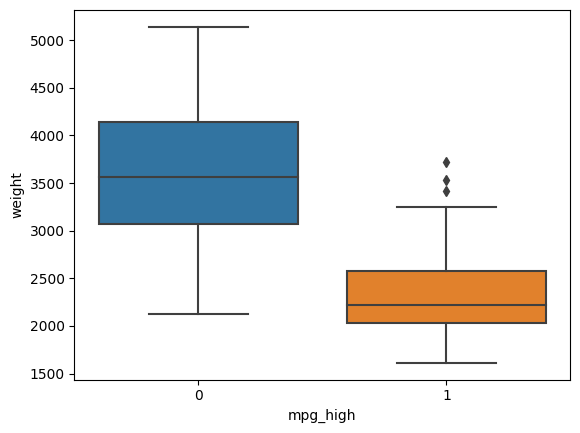

In [472]:
# c. Using seaborn to boxplot with column "mpg_high" on x-axis and weight on y-axis
sb.boxplot(df, x = "mpg_high", y = "weight")

#### 7. Train/Test Split

In [473]:
# a, b, c. Creating 80/20 split and using seed 1234 to get same results each run
X = df.drop(columns = ["mpg_high"])
X_train, X_test, Y_train, Y_test = train_test_split(X, df["mpg_high"], test_size = 0.2, random_state = 1234)

# d. Output the dimensions of train and test
print("Showing size of test and train subsets:")
print("\tSize of test: ", X_test.shape)
print("\tSize of train: ", X_train.shape)

Showing size of test and train subsets:
	Size of test:  (78, 7)
	Size of train:  (311, 7)


#### 8. Logistic Regression

In [474]:
# a, b. Making logistic regression model
logisticRegression = LogisticRegression(solver = "lbfgs", max_iter=100000)
logisticRegression.fit(X_train, Y_train)
logisticRegression.score(X_train, Y_train)

# Making prediction on logistic regression model
pred = logisticRegression.predict(X_test)

# Finding accuracy score, precision score, recall score, and f1 score
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
score = logisticRegression.score(X_test, Y_test)

print("Logistic Regression:")
print("\tAccuracy score: ", accuracy)
print("\tPrecision score: ", precision)
print("\tRecall score: ", recall)
print("\tf1 score: ", f1)
print("\tScore: ", score)

# Making confusion matrix
confusion_matrix(Y_test, pred)

# c. Printing classification report
print("\n\tClassification Report:")
print(classification_report(Y_test, pred))

Logistic Regression:
	Accuracy score:  0.8974358974358975
	Precision score:  0.7777777777777778
	Recall score:  1.0
	f1 score:  0.8750000000000001
	Score:  0.8974358974358975

	Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



#### 9. Decision Tree

In [475]:
# a. Training a decision tree
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)

# b. Making prediction on decision tree model
pred = decisionTree.predict(X_test)

# Finding accuracy score, precision score, recall score, and f1 score
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
score = decisionTree.score(X_test, Y_test)

print("Decision Tree:")
print("\tAccuracy score: ", accuracy)
print("\tPrecision score: ", precision)
print("\tRecall score: ", recall)
print("\tf1 score: ", f1)
print("\tScore: ", score)

# Making confusion matrix
confusion_matrix(Y_test, pred)

# c. Printing classification report
print("\n\tClassification Report:")
print(classification_report(Y_test, pred))

Decision Tree:
	Accuracy score:  0.8717948717948718
	Precision score:  0.8
	Recall score:  0.8571428571428571
	f1 score:  0.8275862068965518
	Score:  0.8717948717948718

	Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.80      0.86      0.83        28

    accuracy                           0.87        78
   macro avg       0.86      0.87      0.86        78
weighted avg       0.87      0.87      0.87        78



#### 10. Neural Network
e. Compare the two models and why you think the performance was same/different
In neural networks, each node in the hidden layers learns a different function from the inputs. 
With too few nodes, underfitting can occur and vice-versa. The differences in the output occur due to 
the dataset size combined with the different number of layers and nodes influencing the model's chances
of underfitting or overfitting. As seen when the hidden_layer_size was set to (6,3) and when the hidden layer size was set to (15, 10, 5), the MSE, correlation, and score are all impacted by the number 
of hidden layers and the number of nodes within each layer. From these outputs, it would be a fair 
assumption to say that as the number of layers and nodes increase from (6, 3), the worse the neural
network for this dataset performs, as seen by the stark difference between the MSE, correlation, and score between the two models.

Though we were only asked to test two neural networks, I went ahead and created three -- simply because I was interested in seeing the outputs for much larger number of nodes in each layer. As seen in the third output, having a hidden_layer_size set to (100, 50) produced a lower MSE and higher score and correlation than the second model, but a worse correlation, score, and MSE to the first model.

 By the structure of neural networks, changing the number of layers and nodes directly impact the output of the neural network models.

In [476]:
# a. train a neural network, choosing a network topology of your choice
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# b. First neural network model with 6 nodes in the first hidden layer and 3 nodes in the second 
# hidden layer
regr = MLPRegressor(hidden_layer_sizes = (6, 3), max_iter = 5000, random_state = 1234)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
correlation = r2_score(Y_test, Y_pred)
score = regr.score(X_test, Y_test)

print("1. hidden_layer_sizes = (6, 3)")
print("\tMSE: ", mse)
print("\tCorrelation: ", correlation)
print("\tScore: ", score)

# c, d. Second neural network model with 15 nodes in the first hidden layer, 10 nodes in the second 
# hidden layer, and 5 nodes in the third hidden layer
regr = MLPRegressor(hidden_layer_sizes = (15, 10, 5), max_iter = 5000, random_state = 1234)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
correlation = r2_score(Y_test, Y_pred)
score = regr.score(X_test, Y_test)

print("\n2. hidden_layer_sizes = (15, 10, 5)")
print("\tMSE: ", mse)
print("\tCorrelation: ", correlation)
print("\tScore: ", score)

# Third neural network model with 7 nodes in the first hidden layer and 4 nodes in the second 
# hidden layer
regr = MLPRegressor(hidden_layer_sizes = (7, 4), max_iter = 5000, random_state = 1234)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
correlation = r2_score(Y_test, Y_pred)
score = regr.score(X_test, Y_test)

print("\n3. hidden_layer_sizes = (100, 50)")
print("\tMSE: ", mse)
print("\tCorrelation: ", correlation)
print("\tScore: ", score)

1. hidden_layer_sizes = (6, 3)
	MSE:  0.08188287460306254
	Correlation:  0.6441604220821195
	Score:  0.6441604220821195

2. hidden_layer_sizes = (15, 10, 5)
	MSE:  0.11553113107870458
	Correlation:  0.4979347132265437
	Score:  0.4979347132265437

3. hidden_layer_sizes = (100, 50)
	MSE:  0.08718585115782261
	Correlation:  0.6211152011112908
	Score:  0.6211152011112908
